# Analyzing Prosper Loan Data
## by Luming Zhang

## Investigation Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The main purpose for this investigation is to learn the following two problems:

1. What factors affect a loan’s outcome status?

2. What affects the borrower’s APR or interest rate?

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After looking at this dataset,  features like 'CreditGrade', 'BorrowerAPR', 'ProsperRating', 'IncomeRange', 'DebtToIncomeRatio', 'LoanStatus' and 'EmploymentStatus' maybe suppport the investigation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## Univariate Exploration

By observing variable __DebtToIncomeRatio__, there are not too many data between ratio 1.5 and 10. Therefore, we need to regard those data between ratio 1.5 and ratio 10 as outliers. As the result, we need to focus on data between ratio 0 and 1.5. After removing the ourliers, we can see that this distribution is right skewed. And the median is near 0.2. It means that most of loans were given to borrowers whose debt is 5 times more than their income.

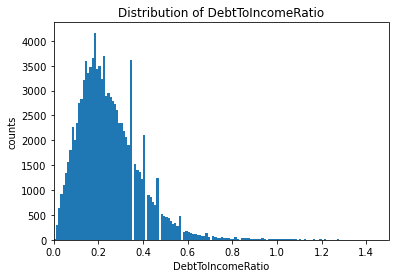

In [3]:
DebtToIncomeRatio = df['DebtToIncomeRatio']
DebtToIncomeRatio = DebtToIncomeRatio.dropna()
bins = np.arange(DebtToIncomeRatio.min(), DebtToIncomeRatio.max(), 0.01)

plt.hist(data=df, x='DebtToIncomeRatio', bins=bins);
plt.xlim(0,1.5);
plt.title('Distribution of DebtToIncomeRatio')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('counts')
plt.show();

## Bivariate Exploration

From the correlation heatmap, we can see that __ProsperRating (numeric)__ is highly correlated with __BorrowerAPR__ and __BorrowerRate__. __BorrowerAPR__ and __BorrowerRate__ have the highest correlation between each other. At the begining, we assumed that __'DebtToIncomeRatio'__ maybe have impact on loan inerest. However, from the plots, we see that the correlation coefficient between __'DebtToIncomeRatio'__ and __BorrowerRate__ is nearly __0__, which means that there is no correlation between these two variables.

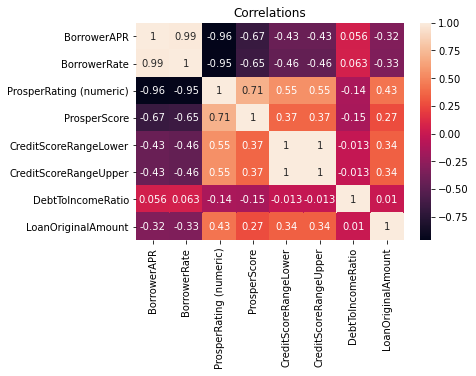

In [4]:
sub = ['BorrowerAPR','BorrowerRate', 'ProsperRating (numeric)','ProsperScore', 'CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','LoanOriginalAmount']
sb.heatmap(df[sub].corr(),annot = True).set_title("Correlations")
plt.show();

## Multivariate Exploration

Overall, the trend of __BorrowerAPR__ is decreasing with the __ProsperRating__ goes up, which means that borrowers with high __ProsperRating__ would have lower APR. By observing the __Term__ of each group, We can see that for low prosperrating borrowers, they likely have 12 months loan with higher APR and 60 months loan with lower APR. And for high prosper rating borrowers, they likely have 60 months loan with higher APR and 12 months loan with lower APR.

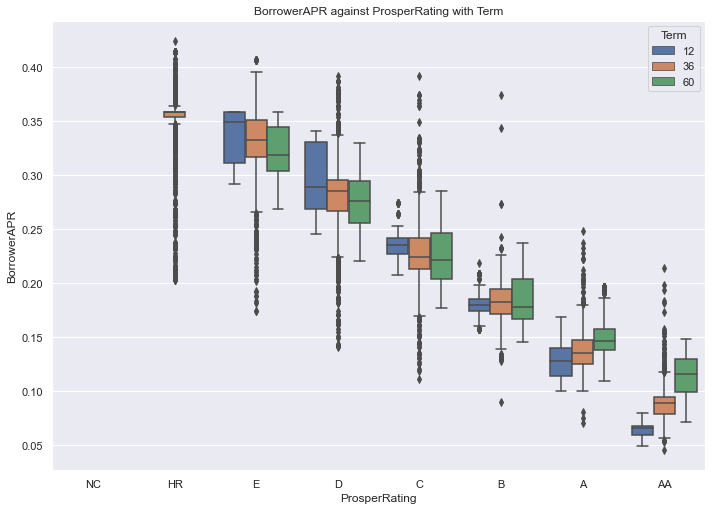

In [8]:
order = ['NC','HR','E','D','C','B','A','AA']
pra = pd.Categorical(df['ProsperRating (Alpha)'], categories=order)
sb.set(rc={'figure.figsize':(11.7,8.27)})
ax = sb.boxplot(x=pra,y=df['BorrowerAPR'],hue = df['Term']);
ax.set(xlabel='ProsperRating', ylabel='BorrowerAPR', title='BorrowerAPR against ProsperRating with Term');

In [10]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 692366 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "D:\Anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "D:\Anaconda\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "D:\Anaconda\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "D:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "D:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "D:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 491, in convert_si